# Forecast number of headcount daily

## Data Processing

### Read data

In [18]:
from pandas import read_csv

data = read_csv('daily.csv', na_filter=False)

### Drop first day and last day

In [19]:
data.drop([0, len(data) - 1], inplace=True)

### Standardize data

In [20]:
data['count'] = data['MAC']
mean = data['MAC'].mean()
std = data['MAC'].std()
data['MAC'] = (data['MAC'] - mean) / std

### Size of history in days

In [21]:
size_h = 14

### Index of target days in break period

In [22]:
br = [index for index in data.index[data['break']].tolist() if index >= size_h]

### Index of target days not in break period

In [23]:
not_br = [index for index in data.index[data['break'] == False].tolist() if index >= size_h]

### Seperate features and target

In [24]:
from numpy import array

def resh(data):
    return data.reshape(data.shape[0], size_h, 1)

def seperate(list):
    x = []
    y = []
    for index in list:
        x.append(data['MAC'][index - size_h : index])
        y.append(data['MAC'][index])
    return resh(array(x)), array(y)

### Data in break period

In [25]:
x_br, y_br = seperate(br)

### Data not in break period

In [26]:
x_not, y_not = seperate(not_br)

## Design models using tensorflow keras

In [27]:
from tensorflow.keras.layers import Input, LSTM, Dense, PReLU
from tensorflow.keras.models import Sequential

# shape of output
sh = 32
# optimizer
optimizer = 'nadam'
# loss function
f = 'mse'

def build():
    model = Sequential()
    model.add(LSTM(sh, input_shape=(size_h, 1))) # Long short-term memory
    model.add(Dense(sh, activation='linear')) # Dense
    model.add(PReLU()) # activation for previous dense layer
    model.add(Dense(1, activation='linear')) # output layer
    model.compile(optimizer=optimizer, loss=f)
    return model

### Build models

In [28]:
model_br = build()
model_not = build()

## Train model

### Hyperparameters

In [29]:
# numbers of epoch
no = 100
# test set size
size = 0.1

### Visualize training losses

In [30]:
import matplotlib.pyplot as plt

def pl(track):
    loss = track.history['loss']
    val_loss = track.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.legend()
    plt.show()

Train on 44 samples, validate on 5 samples
Epoch 1/100
44/44 - 2s - loss: 1.0942 - val_loss: 0.5392
Epoch 2/100
44/44 - 0s - loss: 0.9696 - val_loss: 0.4535
Epoch 3/100
44/44 - 0s - loss: 0.8712 - val_loss: 0.3762
Epoch 4/100
44/44 - 0s - loss: 0.7817 - val_loss: 0.3064
Epoch 5/100
44/44 - 0s - loss: 0.6948 - val_loss: 0.2364
Epoch 6/100
44/44 - 0s - loss: 0.6065 - val_loss: 0.1673
Epoch 7/100
44/44 - 0s - loss: 0.5190 - val_loss: 0.1060
Epoch 8/100
44/44 - 0s - loss: 0.4351 - val_loss: 0.0547
Epoch 9/100
44/44 - 0s - loss: 0.3592 - val_loss: 0.0224
Epoch 10/100
44/44 - 0s - loss: 0.2950 - val_loss: 0.0115
Epoch 11/100
44/44 - 0s - loss: 0.2491 - val_loss: 0.0227
Epoch 12/100
44/44 - 0s - loss: 0.2233 - val_loss: 0.0431
Epoch 13/100
44/44 - 0s - loss: 0.2091 - val_loss: 0.0658
Epoch 14/100
44/44 - 0s - loss: 0.2034 - val_loss: 0.0644
Epoch 15/100
44/44 - 0s - loss: 0.1934 - val_loss: 0.0684
Epoch 16/100
44/44 - 0s - loss: 0.1850 - val_loss: 0.0698
Epoch 17/100
44/44 - 0s - loss: 0.1779

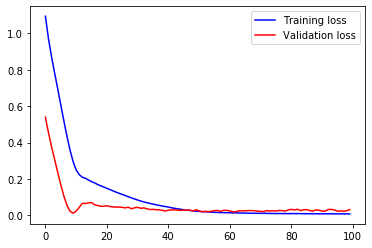

In [31]:
track = model_br.fit(x_br, y_br, epochs=no, verbose=2, validation_split=size, shuffle=True)
pl(track)

### Not in break period

Train on 63 samples, validate on 7 samples
Epoch 1/100
63/63 - 2s - loss: 0.7048 - val_loss: 0.3933
Epoch 2/100
63/63 - 0s - loss: 0.6515 - val_loss: 0.3671
Epoch 3/100
63/63 - 0s - loss: 0.6108 - val_loss: 0.3440
Epoch 4/100
63/63 - 0s - loss: 0.5737 - val_loss: 0.3240
Epoch 5/100
63/63 - 0s - loss: 0.5394 - val_loss: 0.3075
Epoch 6/100
63/63 - 0s - loss: 0.5113 - val_loss: 0.2952
Epoch 7/100
63/63 - 0s - loss: 0.4796 - val_loss: 0.2854
Epoch 8/100
63/63 - 0s - loss: 0.4560 - val_loss: 0.2810
Epoch 9/100
63/63 - 0s - loss: 0.4403 - val_loss: 0.2787
Epoch 10/100
63/63 - 0s - loss: 0.4245 - val_loss: 0.2775
Epoch 11/100
63/63 - 0s - loss: 0.4128 - val_loss: 0.2761
Epoch 12/100
63/63 - 0s - loss: 0.4046 - val_loss: 0.2733
Epoch 13/100
63/63 - 0s - loss: 0.3930 - val_loss: 0.2682
Epoch 14/100
63/63 - 0s - loss: 0.3833 - val_loss: 0.2613
Epoch 15/100
63/63 - 0s - loss: 0.3718 - val_loss: 0.2546
Epoch 16/100
63/63 - 0s - loss: 0.3594 - val_loss: 0.2470
Epoch 17/100
63/63 - 0s - loss: 0.3487

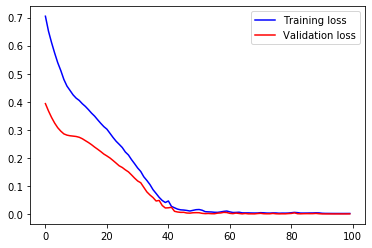

In [32]:
track = model_not.fit(x_not, y_not, epochs=no, verbose=2, validation_split=size, shuffle=True)
pl(track)

## Evaluate performance

### Cross validation

In [35]:
from sklearn.model_selection import KFold
from math import sqrt

cv = KFold(n_splits=10, shuffle=True)

# number of epochs
no = 80

def cross_valid(x, y):
    score = 0
    for train, test in cv.split(x, y):    
        model = build()
        model.fit(x[train], y[train], epochs=no, verbose=0, shuffle=True)
        score += sqrt(model.evaluate(x[test], y[test]))
    return score / 10

### In break period

In [36]:
print(cross_valid(x_br, y_br) * std)

4/4 [==============================] - 0s 78ms/sample - loss: 0.0145
343.9321197852526


### Not in break period

In [44]:
print(cross_valid(x_not, y_not) * std)

7/7 [==============================] - 0s 41ms/sample - loss: 0.0048
226.40905599287973


## Visulization

### Convert to date time object

In [39]:
from pandas import to_datetime

data['time'] = to_datetime(data['time'], infer_datetime_format=True)

### Prediction

In [42]:
from math import nan

prediction = []
for index in range(len(data)):
    if index < size_h:
        prediction.append(nan)
    else:
        x = array(data['MAC'][index - size_h : index]).reshape(1, size_h, 1)
        if data['break'][index]:
            prediction.append(model_br.predict(x) * std + mean)
        else:
            prediction.append(model_not.predict(x) * std + mean)
data['prediction'] = prediction

### Predict next day based on last 14 days

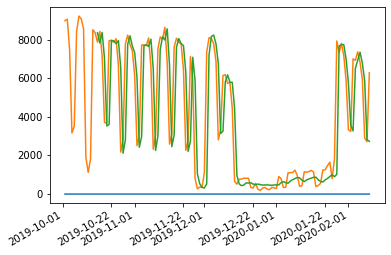

In [43]:
fig, ax = plt.subplots()
ax.plot_date(data['time'], data.drop(['time', 'break'], axis=1), '-')
fig.autofmt_xdate()
plt.show()